In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=4
os.environ["MKL_NUM_THREADS"] = "1" # export MKL_NUM_THREADS=6
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" # export VECLIB_MAXIMUM_THREADS=4
os.environ["NUMEXPR_NUM_THREADS"] = "1" # export NUMEXPR_NUM_THREADS=6


import json
import requests
from pymatgen import MPRester
import pandas as pd
import json
from mendeleev import element
import requests
import numpy as np
import matplotlib.pyplot as plt

from pymatgen.core.structure import Structure
import random


"""
MAKE SURE TO HAVE THE SAME SEED ALWAYS
"""
import matplotlib as mpl
np.random.seed(666)
random.seed(666)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from joblib import Parallel, delayed
from sklearn.base import BaseEstimator, RegressorMixin
from numpy import linalg as LA
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict
import itertools
import pandas as pd
from tqdm import tqdm
import numpy as np




fontsize = 18
plt.rc('font',       size=fontsize)    # controls default text sizes
plt.rc('axes',  titlesize=fontsize)    # fontsize of the axes title
plt.rc('axes',  labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize=fontsize)    # legend fontsize
plt.rc('figure',titlesize=fontsize)    # fontsize of the figure title

Calculate p(x, t) numerically by averaging over many trajectories of a Gaussian
random walker. Compare your results to the analytical solution from the previous
problem (Name_P2_6a.png). By the way, how are you going to deal with time
steps during which the walker "hits the wall"? Assume the walker is at x(t), close
to the wall at L = 2. The next random displacement ∆x puts it beyond the wall.
You can certainly reflect the particle by setting x(t + ∆t) = L − [x(t) + ∆x]. But
what is wrong with the following alternatives?

In [59]:
def default_walker(n, N, L):

    
    #L    = 2


    all_trj = []
    #for i in tqdm(range(N)):
    for i in range(N):

        curr_trj = [0]
        for t in range(n):
            x = curr_trj[-1]
            dx  = np.random.normal(loc = 0, scale=1.0)
            if  x+dx < L: # < thrs:                          

                curr_trj.append(x+dx)

            else:
                #curr_trj.append(x-dx)
                curr_trj.append(L - x - dx)

                
        all_trj.append(curr_trj)

    all_trj     = np.array(all_trj)
    avg_trj     = np.average(all_trj, axis =0)
    avg_sq_trj  = np.average(all_trj*all_trj, axis =0)


    avg_abs     = np.average(np.abs(all_trj), axis = 0)

    return all_trj, avg_trj, avg_sq_trj , avg_abs





def default_walker_two(n, N, L):

    
    #L    = 2


    all_trj = []
    #for i in tqdm(range(N)):
    for i in range(N):

        curr_trj = [0]
        for t in range(n):
            x = curr_trj[-1]
            dx  = np.random.normal(loc = 0, scale=1.0)
            if -L < x+dx < L and  -L < x < L:

                curr_trj.append(x+dx)

            else:


                #curr_trj.append(L - x-dx)
                #"""
                if x > 0:
                    xnew =  L - x - np.random.normal(loc = 0, scale=1.0)
                    #while xnew < -L:
                    #    xnew =  L - x - np.random.normal(loc = 0, scale=1.0)

                    curr_trj.append(xnew)
                else:
                    xnew = -L - x - np.random.normal(loc = 0, scale=1.0)
                    #while xnew > L:
                     #   xnew =  -L - x - np.random.normal(loc = 0, scale=1.0)

                    curr_trj.append(xnew)
                #"""

                
        all_trj.append(curr_trj)

    all_trj     = np.array(all_trj)
    avg_trj     = np.average(all_trj, axis =0)
    avg_sq_trj  = np.average(all_trj*all_trj, axis =0)


    avg_abs     = np.average(np.abs(all_trj), axis = 0)

    return all_trj, avg_trj, avg_sq_trj , avg_abs


def a_walker(n, N):

    L    = 2


    all_trj = []
    for i in tqdm(range(N)):
        curr_trj = [0]
        for t in range(n):
            x = curr_trj[-1]
            dx  = np.random.normal(loc = 0, scale=1.0)
            if -L < x+dx < L:
                curr_trj.append(x+dx)

            else:
                if x >0:
                    curr_trj.append(L)
                else:
                    curr_trj.append(-L)


                
        all_trj.append(curr_trj)

    all_trj     = np.array(all_trj)
    avg_trj     = np.average(all_trj, axis = 0)
    avg_sq_trj  = np.average(all_trj*all_trj, axis = 0)


    

    return all_trj, avg_trj, avg_sq_trj






def b_walker(n, N):

    L    = 2


    all_trj = []
    for i in tqdm(range(N)):
        curr_trj = [0]
        for t in range(n):
            x = curr_trj[-1]
            dx  = np.random.normal(loc = 0, scale=1.0)
            if -L < x+dx < L:
                curr_trj.append(x+dx)

            else:
                curr_trj.append(x)

                
        all_trj.append(curr_trj)

    all_trj     = np.array(all_trj)
    avg_trj     = np.average(all_trj, axis = 0)
    avg_sq_trj  = np.average(all_trj*all_trj, axis = 0)


    return all_trj, avg_trj, avg_sq_trj 




def c_walker(n, N):

    L    = 2


    all_trj = []
    for i in tqdm(range(N)):
        curr_trj = [0]
        for t in range(n):
            x = curr_trj[-1]
            dx  = np.random.normal(loc = 0, scale=1.0)
            if -L < x+dx < L:
                curr_trj.append(x+dx)

            else:
                if x > 0:
                    while x+dx > L:
                        dx  = np.random.normal(loc = 0, scale=1.0)
                    curr_trj.append(x+dx)
                else:
                    while x+dx < -L:
                        dx  = np.random.normal(loc = 0, scale=1.0)
                    curr_trj.append(x+dx)

                
        all_trj.append(curr_trj)

    all_trj     = np.array(all_trj)
    avg_trj     = np.average(all_trj, axis = 0)
    avg_sq_trj  = np.average(all_trj*all_trj, axis = 0)


    return all_trj, avg_trj, avg_sq_trj 




In [60]:
#all_trj, avg_trj, default_avg_sq_trj_two, avg_abs = default_walker(100, 2000, 2)
all_trj, avg_trj, default_avg_sq_trj_two, avg_abs = default_walker_two(200, 6000, 2)
all_trj_a, avg_trj, a_avg_sq_trj         = a_walker(200, 6000)


all_trj_b, avg_trj, b_avg_sq_trj         = b_walker(200, 6000)
all_trj_c, avg_trj, c_avg_sq_trj         = c_walker(200, 6000)

100%|██████████| 6000/6000 [00:05<00:00, 1192.99it/s]


In [33]:
4/3

1.3333333333333333

In [34]:
default_avg_sq_trj_two

array([0.        , 0.95774424, 1.12100267, 1.14710671, 1.16646359,
       1.19203432, 1.1310787 , 1.17393535, 1.17045331, 1.15798389,
       1.18330657, 1.15252918, 1.18877383, 1.1604131 , 1.1933916 ,
       1.18383129, 1.21654221, 1.1868915 , 1.19536018, 1.16923848,
       1.1787354 , 1.14447032, 1.18312679, 1.13373551, 1.17930056,
       1.19742903, 1.19468718, 1.20043264, 1.18680702, 1.15157597,
       1.13823375, 1.16860071, 1.1891099 , 1.15721212, 1.1375162 ,
       1.1834321 , 1.18913733, 1.16501054, 1.19069892, 1.15628293,
       1.17352056, 1.16809436, 1.18513362, 1.20729108, 1.18282673,
       1.18109821, 1.15466663, 1.18595441, 1.18484751, 1.18662899,
       1.18121903, 1.20543455, 1.16073485, 1.15539384, 1.19385561,
       1.17480925, 1.1948592 , 1.13370977, 1.15902014, 1.17972404,
       1.19733438, 1.16206009, 1.1176693 , 1.17841989, 1.18515348,
       1.17267588, 1.20393597, 1.1808172 , 1.18040417, 1.19598906,
       1.18029913, 1.1699628 , 1.17440148, 1.1675023 , 1.22062

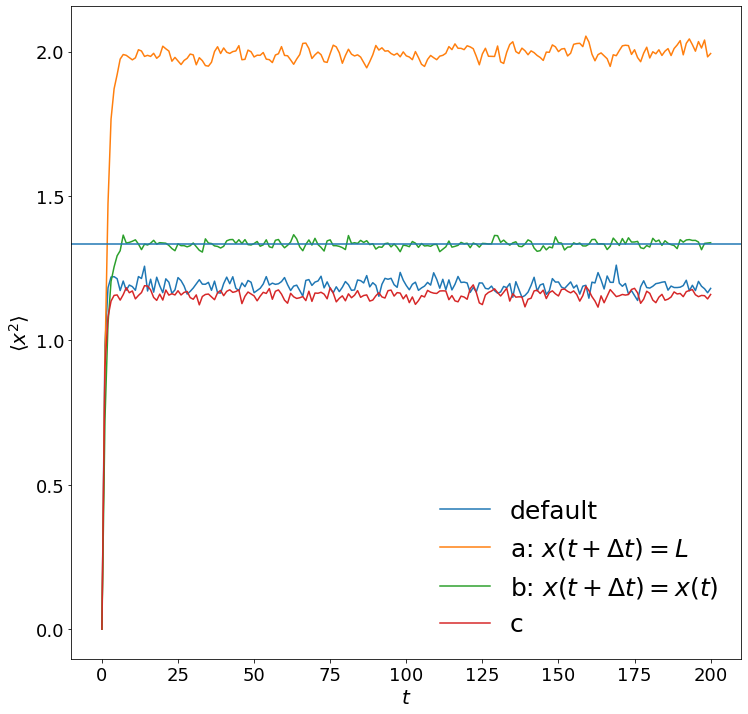

In [61]:
fig,ax = plt.subplots(figsize = (12, 12))
ax.plot(default_avg_sq_trj_two, label='default')
ax.plot(a_avg_sq_trj , label='a: $x(t+\Delta t) = L $')
ax.plot(b_avg_sq_trj , label='b: $x(t+\Delta t) = x(t) $')
ax.plot(c_avg_sq_trj , label='c')
#ax.plot(np.linspace(0, 100),np.linspace(0, 100), color='black' , label="No Barrier" )
ax.set_xlabel(r"$t$", fontsize = 20)
ax.set_ylabel(r"$\langle x^2 \rangle $",  fontsize = 20)
ax.axhline(y=1.333333, xmin=0, xmax=200)
ax.legend(fontsize= 25, frameon=False)
plt.savefig('./figures/JanW_P2_6b.png')
#plt.ylim(0, 20)

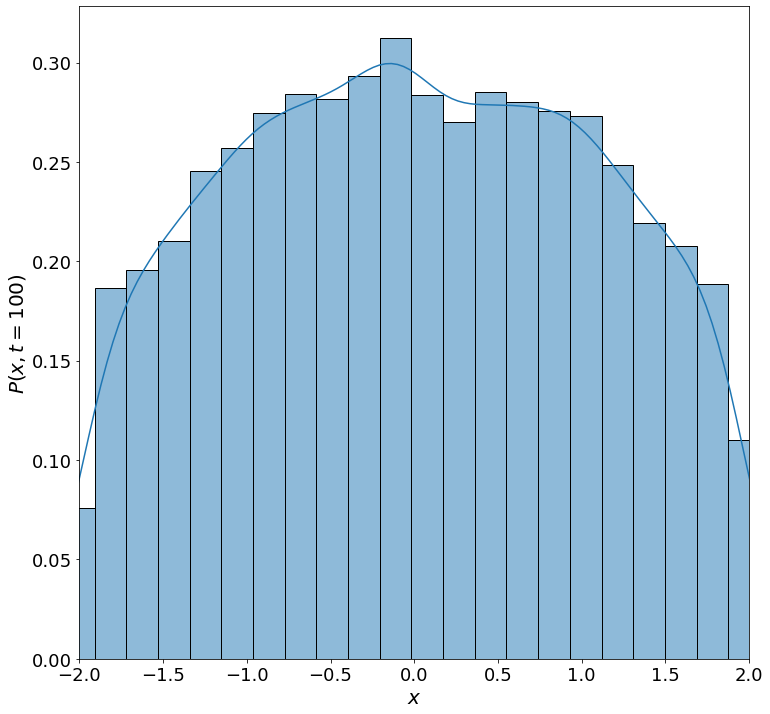

In [64]:
fig,ax = plt.subplots(figsize = (12, 12))
import seaborn as sns
sns.histplot(all_trj_c[:, 200],  kde=True,stat='density', ax=ax)
ax.set_xlabel(r"$x$", fontsize = 20)
ax.set_ylabel(r"$P(x, t = 100)$", fontsize = 20)
plt.xlim(-2, 2)
plt.savefig('./figures/JanW_P2_6a.png')

In [65]:
from joblib import Parallel, delayed
all_last_val = []
Lrng = np.linspace(1, 30.0, 200)


def get_last_pos(l):    
    all_trj, avg_trj, default_avg_sq_trj, avg_abs = default_walker(100, 100000, l)
    return avg_abs[-1]



X = np.array(Parallel(n_jobs=-1)(delayed(get_last_pos)(l) for l in Lrng))



9.160804020100501


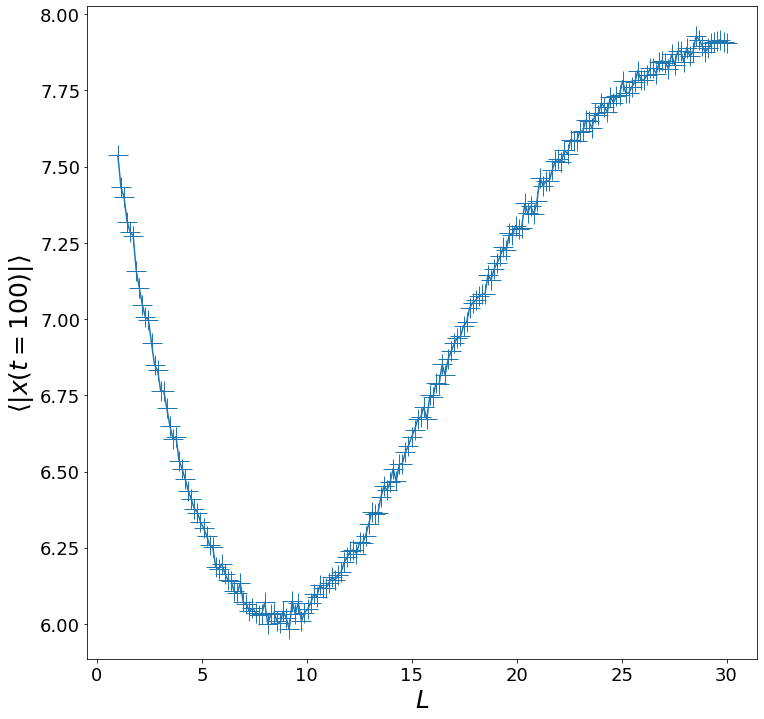

In [70]:
fig,ax = plt.subplots(figsize = (12, 12))
ax.set_xlabel(r"$L$", fontsize=25)
ax.set_ylabel(r"$\langle | x (t= 100) | \rangle $",fontsize=25)
ax.plot(Lrng, X, '-+', ms=20)
print(Lrng[np.argmin(X)])


plt.savefig('./figures/JanW_P2_7a.png')

In [68]:
all_trj, avg_trj, default_avg_sq_trj, avg_abs = default_walker(100, 100000, Lrng[np.argmin(X)])


In [1]:
fig1,ax1 = plt.subplots(figsize = (12, 12))
n_sel = [4, 9, 16, 25, 36, 49, 64, 81, 100]
NCURVES=len(n_sel)
colors=plt.cm.winter(np.linspace(0,1,NCURVES))
for ind, n in enumerate(n_sel):
    #sns.histplot(all_trj[:,n], color=colors[ind],cbar=False,  kde=True, ax=ax)
    sns.histplot(all_trj[:,n], color=colors[ind],  kde=True,stat='density', ax=ax1, label= n)



ax1.set_xlabel(r"$x$", fontsize=25)
ax1.set_ylabel(r"$p(x, t) $",fontsize=25)

plt.savefig('./figures/JanW_P2_7b.png')
#plt.show()

NameError: name 'plt' is not defined

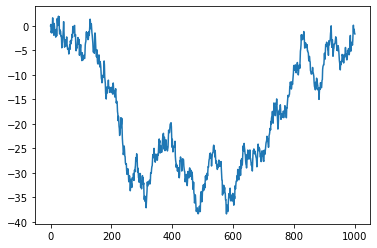

In [95]:
opt = 0

n    = 1000

thrs = 1
L    = 2

curr_trj = [0]
for t in range(n):
    x = curr_trj[-1]



    if opt == 0:
        dx  = np.random.normal(loc = 0, scale=1.0)
        if  x+dx < L:                                #abs(x+dx-L) < thrs:
            curr_trj.append(x+dx)

        else:
            #curr_trj.append(x-dx)
            curr_trj.append(L - x - dx)



    if opt == 'a':
        dx  = np.random.normal(loc = 0, scale=1.0)
        if  x+dx < L:                                #abs(x+dx-L) < thrs:
            curr_trj.append(x+dx)

        else:
            curr_trj.append(L)

    if opt == 'b':
        dx  = np.random.normal(loc = 0, scale=1.0)
        if  x+dx < L:
            curr_trj.append(x+dx)

        else:
            curr_trj.append(x)


    if opt == 'c':
        dx  = np.random.normal(loc = 0, scale=1.0)
        if  x+dx < L:
            curr_trj.append(x+dx)

        else:
            while x+dx > L:
                dx  = np.random.normal(loc = 0, scale=1.0)
            curr_trj.append(x+dx)





#plt.ylim(-10, 2)
plt.plot(curr_trj)


(array([ 1.,  6., 13., 16., 18., 18., 14.,  8.,  2.,  4.]),
 array([-2.41206779, -1.92872046, -1.44537312, -0.96202578, -0.47867844,
         0.00466889,  0.48801623,  0.97136357,  1.4547109 ,  1.93805824,
         2.42140558]),
 <BarContainer object of 10 artists>)

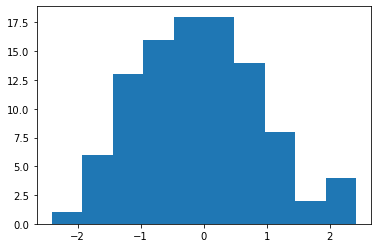

In [19]:
plt.hist(np.random.normal(loc = 0, scale=1.0, size=100))